# Рынок заведений общественного питания Москвы.

In [1]:
import pandas as pd # Загрузка библиотеки pandas.
import numpy as np # Импорт билиотеки numpy.
import plotly.express as px # Импорт API Plotly для быстрого доступа к основным методам библиотеки.
import seaborn as sns # Импорт библиотеки seaborn.
import matplotlib.pyplot as plt # Импорт библотеки matplotlib.

import warnings
warnings.filterwarnings('ignore')

## Загрузка и подготовка данных.

Описание данных:
 - id — идентификатор объекта;
 - object_name — название объекта общественного питания;
 - chain — сетевой ресторан;
 - object_type — тип объекта общественного питания;
 - address — адрес;
 - number — количество посадочных мест.

Перед исследованием необходимо изучить данные и проверить на наличие ошибок. Для этого соберём информацию о таблице данных и проверим на наличие пропусков и дубликатов.

In [2]:
rest_data = pd.read_csv('/datasets/rest_data.csv') # Загрузка данных и сохранение в перпменной.

In [3]:
def info(data):
    """"
    Функция для вывода первых 5 строк, краткой информации и статистики по таблицам данных.
    """    
    display(data.head())
    print(60*'*')
    display(data.info())
    print(60*'*')
    display(data.describe())

In [4]:
info(rest_data) # Вывод информации об заведениях общественного питания.

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


None

************************************************************


,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


In [5]:
rest_data.duplicated().sum() # Проверка на дубликаты.

0

В таблице данных нет пропусков и явных дубликатов. Названия всех столбцов приведены к змеиному регистру. Среднее занчение смещено относительно медианы ближе к минимуму, значит данные скошены вправо.

Названия заведений в таблице написаны разным регистром, приведём их к единому виду, чтобы было проще обрабатывать.

In [6]:
rest_data['object_name'] = rest_data['object_name'].str.lower() # Приведение названий к нижнему регистру.

Некоторые завдения могли попасть в список сетевых и не сетевых одновременно, проверим это.

In [7]:
# Проверка заведения на принадлежность к сетевым и не стевым одновременно.
both_type_chain = np.intersect1d(
    rest_data.query('chain == "да"')['object_name'].unique(), rest_data.query('chain == "нет"')['object_name'].unique()
)
print(both_type_chain, len(both_type_chain))

['fridays' 'goodman гудман' 'tutti frutti' 'tutti frutti frozen yogurt'
 'upside down cake' 'азбука вкуса' 'виктория' 'готовые блюда милти'
 'кальянная мята lounge' 'кафе «subway»' 'кафе «хинкальная»'
 'кафе «хлеб насущный»' 'кафе «шоколадница»' 'кафе «штолле»'
 'кафе бургер кинг' 'кафе при азс' 'кафе теремок' 'колбасофф'
 'кондитерская-пекарня волконский' 'кофе' 'кофепорт' 'лукойл' 'магнолия'
 'мята' 'пицца «паоло»' 'ресторан «kfc»' 'ресторан «бургер кинг»'
 'ресторан «хинкальная»' 'ресторан «якитория»' 'темпл бар'
 'теремок инвест' 'теремок-инвест' 'шоколадница' 'япоша'] 34


Проверка показала, что таких заведений 34, исправим это с помощью функции.

In [8]:
def correction_chain(row):
    """
    Функция для замены значения в столбце 'chain' на "да" для названий заведений при их наличии в переменной both_type_chain.
    """
    if row['object_name'] in both_type_chain:
        return 'да'
    else:
        return row['chain']

In [9]:
rest_data['chain'] = rest_data.apply(correction_chain, axis=1) # Применение функции.

Проверим результат работы функции.

In [10]:
# Проверка заведения на принадлежность к сетевым и не стевым одновременно.
both_type_chain = np.intersect1d(
    rest_data
        .query('chain == "да"')['object_name']
        .unique(), rest_data.query('chain == "нет"')['object_name'].unique()
)
print(both_type_chain, len(both_type_chain))

[] 0


Теперь в таблице нет заведений попавших в сетевые и не сетевые одновременно.

Имена в таблице написаны по разному, поэтому приведём их к единому виду для курпных сетей.

In [11]:
def new_name(row):
    """"
    Функция приводит к единому виду имена крупных сетевых заведений.
    """
    if 'wok' in row or 'вок' in row:
        return  'Суши Wok'
    elif 'академия' in row:
        return 'Академия'
    elif 'якитор' in row:
        return 'Якитория'
    elif 'сабв' in row:
        return 'Subway'
    elif 'kfc' in row:
        return 'KFC'
    elif 'бургер кинг' in row:
        return 'Burger King'
    elif 'макдонал' in row:
        return 'McDonldas'
    elif 'шоколадница' in row:
        return 'Шоколадница'
    elif 'кртошка' in row:
        return 'Крошка картошка'
    else: return row['object_name']

In [12]:
rest_data['object_name'] = rest_data.apply(new_name, axis=1) # Изменение названий заведений в таблице.

## Анализ данных.

Анализ данных будет состоять из нескольких шагов:
 - исследование соотношения видов объектов по количеству;
 - исследование количества сетевых и не сетевых заведений по количеству;
 - для каждого вида объекта общественного питания описать среднее количество посадочных мест;
 - построить график топ-10 улиц по количеству объектов общественного питания;
 - поиск числа улиц с одним объектом общественного питания;
 - посмотреть на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.

### Соотношение видов объектов по количеству.

Построим график соотношения видов объектов по количеству.

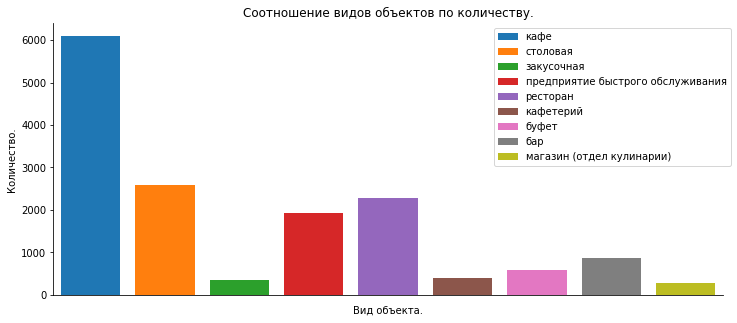

In [13]:
# Построение графика соотношения видов объектов по количеству.
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='object_type', 
                 y='id', 
                 data=rest_data, 
                 hue='object_type', 
                 estimator=len, 
                 dodge=False, 
                 saturation=1)
ax.set(xtickLabels=[])
ax.set_title('Соотношение видов объектов по количеству.')
ax.set_xlabel('Вид объекта.')
ax.set_ylabel('Количество.')
ax.tick_params(bottom=False)
plt.legend(bbox_to_anchor=(0.65, 1))
sns.despine()

Нибольшее число заведений общественного питания это кафе, около 6000. Наименьшее - магазин(отдел кулинарии), закусочная, кафетерий и буфет, около 500. 

### Соотношение сетевых и не сетевых заведений по количеству.

Построим график соотношения сетевых и не сетевых заведений по их количеству.

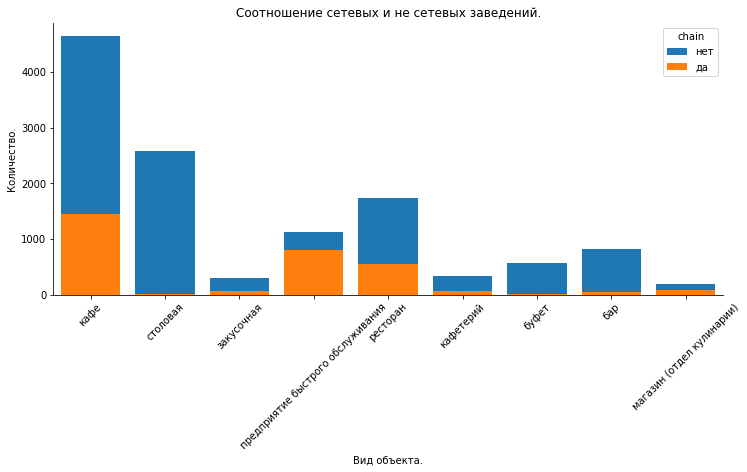

In [14]:
# Построение графика соотношения сетевых и не сетевых заведений по количеству.
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='object_type', 
                 y='id', 
                 data=rest_data, 
                 hue='chain', 
                 estimator=len, 
                 dodge=False, 
                 saturation=1)
ax.set_title('Соотношение сетевых и не сетевых заведений.')
ax.set_xlabel('Вид объекта.')
ax.set_ylabel('Количество.')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
sns.despine()

В большинстве случаев, количество сетевых заведенеий меньше, чем не сетевых. Лишь в сегменте быстрого питания картина противоположная, сетевые заведения чаще встречаются, чем не сетевые.

Расчитаем долю сетевых заведений по каждому объекту.

In [35]:
chain_data = rest_data.pivot_table(index='object_type', columns='chain', values='id', aggfunc='count').reset_index()
chain_data['ratio'] = ((chain_data['да']/(chain_data['да']+chain_data['нет']))*100).round(2)
chain_data

chain,object_type,да,нет,ratio
0,бар,41,815,4.79
1,буфет,12,573,2.05
2,закусочная,56,304,15.56
3,кафе,1447,4652,23.73
4,кафетерий,59,339,14.82
5,магазин (отдел кулинарии),79,194,28.94
6,предприятие быстрого обслуживания,799,1124,41.55
7,ресторан,557,1728,24.38
8,столовая,4,2583,0.15


Наибольшая доля сетевых заведений наблюдается в сегменте предприятий быстрого обслуживания - 41%. Следом идут: отдел кулинарии в магазине - 29%, рестораны - 24% и кафе - 24%. В остальных сегментах эта доля становится не значительной - менее 16%.

Изучим что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

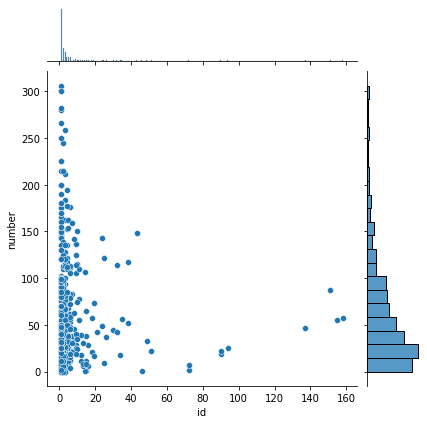

In [16]:
rest_chain = (rest_data[rest_data['chain']=='да']
                    .groupby('object_name')
                    .agg({'id': 'count', 'number': 'mean'})
                    .reset_index())
sns.jointplot(x='id', y='number', data=rest_chain)

По данному графику можно сказать, что в основном преобладают сетевые заведения с боьшим количеством точек, но малым количеством посадочных мест. Заведениями с нулевым количеством посадочных мест могут быть дорожные кафе на азс или "МакАвто" и аналоги.

### Соотношение видов объектов по количеству посадочных мест.

Опаределим какой вид объекта общественного питания предоставляет больше посадочных мест.

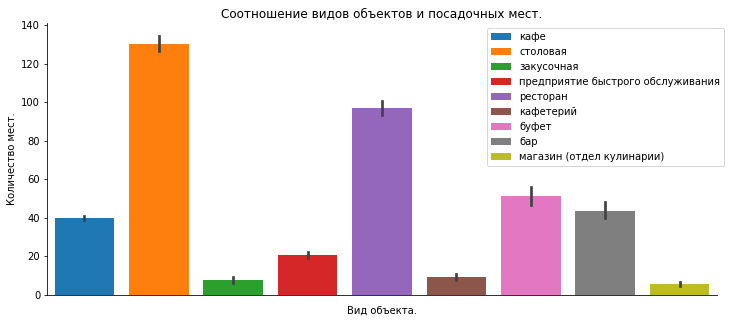

In [17]:
# Построение графика соотношения видов объектов и количества мест.
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='object_type', 
                 y='number', 
                 data=rest_data, 
                 hue='object_type', 
                 dodge=False, 
                 saturation=1)
ax.set(xtickLabels=[])
ax.set_title('Соотношение видов объектов и посадочных мест.')
ax.set_xlabel('Вид объекта.')
ax.set_ylabel('Количество мест.')
ax.tick_params(bottom=False)
plt.legend(bbox_to_anchor=(0.65,1))
sns.despine()

Наибольшее количество посадочных мест у столовых, ресторанов, буфетов и баров. Далее в порядке убывания идут: буфеты, бары, кафе, предприятия быстрого питания, кафетерии, закусочные и магазины с отделом кулинарии.

### Улицы.

Выделим названия улиц в отдельный столбец.

In [18]:
# Список улиц для функции.
street_def=['улица', 
            'проезд', 
            'бульвар', 
            'шоссе', 
            'переулок', 
            'проспект', 
            'набережная', 
            'площадь', 
            'аллея', 
            'тупик', 
            'квартал', 
            'просек', 
            'район', 
            'линия', 
            'горы', 
            'парк', 
            'деревня', 
            'посёлок']

def get_street(row):
    """
    Функция возвращает улицу из адреса, сопоставляя со списком street_def.
    """
    for e in row.split(','):
        for i in street_def:
            if i in e.lower():
                return e
rest_data['streetname'] = rest_data['address'].apply(get_street) # Применение функции и сохранение улиц в новом столбце.
rest_data['streetname'] = rest_data['streetname'].str.strip() # Удаление пробелов в названии улиц.

In [19]:
rest_data.head()

,id,object_name,chain,object_type,address,number,streetname
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


Найдём топ-10 улиц с наибольшим количеством заведений, и определим в каких районах они расположены с помощью сторонних источников.

In [20]:
street_data = rest_data.groupby('streetname')['id'].agg('count').reset_index() # Группировка по улицам и подсчёт объектов.
street_data = street_data.sort_values(by='id', ascending=False)[0:10] # Соритровка по возрастанию количества объектов и 
                                                                      # срез по первым 10 улицам.

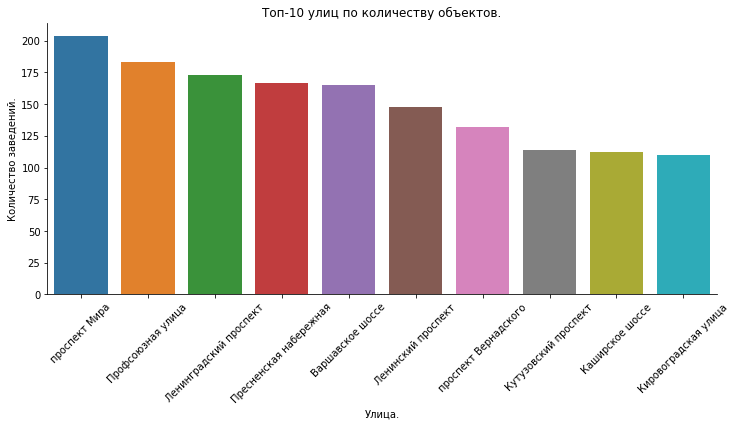

In [21]:
# Построение графика топ-10 улиц по количеству объектов.
plt.figure(figsize=(12, 5))
ax = sns.barplot(
    x='streetname', 
    y='id', 
    data=street_data, 
    hue='streetname',
    dodge=False)
ax.set_title('Топ-10 улиц по количеству объектов.')
ax.set_xlabel('Улица.')
ax.set_ylabel('Количество заведений.')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.legend().remove()
sns.despine()

Наибольшее количество заведений находится на проспекте Мира, около 200. На 6 улицах из 10 расположено от 130 до 180 заведений на каждой. На остальных (Кутузовский проспект, Каширское шоссе и Кировоградская улица) - не более 125. 

In [22]:
# Импорт внешних данных для определения расположения улиц по районам.
moscow_district = pd.read_csv('https://frs.noosphere.ru/xmlui/bitstream/handle/20.500.11925/714058/mosgaz-streets.csv')

In [23]:
moscow_district.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [24]:
top_10 = street_data.merge(moscow_district, on='streetname', how='left') # Объединение таблиц.
area_10 = top_10.groupby('area')['id'].sum().sort_values(ascending=False).head(10) # Вывод 10 районов с наибольшим количеством объектов.
area_10

area
Район Теплый Стан              331
Обручевский район              331
Донской район                  313
Район Проспект Вернадского     280
Ломоносовский район            280
Район Тропарево-Никулино       280
Район Гагаринский              280
Район Нагатино-Садовники       277
Район Чертаново Центральное    275
Район Чертаново Северное       275
Name: id, dtype: int64

In [25]:
top_10['streetname'].isna().sum() # Проверка правильности соединения таблиц.

0

Пропущенных значений нет, таблицы соединились правильно.

Наибольшее количество заведений общественного питания расположились в районе Теплый Стан и Обручевский район. В остальных районах от 275 до 313 заведений в каждом.

Теперь посчитаем количество улиц с одним объектом.

In [26]:
one_object = rest_data.groupby('streetname')['id'].agg('count').reset_index() # Группировка по улицам и подсчёт объектов.
one_object = one_object.sort_values(by='id', ascending=False) # Соритровка по возрастанию количества объектов.

In [27]:
one_object.columns=['streetname','count_object'] # Переименование столбцов.
one_object=one_object[one_object['count_object']==1] # Срез по условию: 1 объект на улице, и сохранение в переменную.

In [28]:
one_object['streetname'].count() # Подсчёт количества улиц с 1 объектом.

575

Всего таких улиц нашлось 575. С помощью внешнего источника данных, определим в каких районах расположены эти улицы.

In [29]:
area_one_object = one_object.merge(moscow_district, on='streetname', how='left') # Объединение двух таблиц.
area_one_object.groupby('area')['count_object'].sum().sort_values(ascending=False).head(10) # Вывод районов с количеством улиц с 1 объектом.

area
Таганский район        27
Район Хамовники        26
Басманный район        25
Пресненский район      20
Тверской район         20
Район Марьина роща     18
Район Арбат            18
Мещанский район        16
Район Сокольники       15
Район Замоскворечье    14
Name: count_object, dtype: int64

In [30]:
area_one_object['streetname'].isna().sum()

0

Пропущенных значений нет, таблицы соединились правильно.

Максимальное количество улиц с 1 объектом общественного питания расположено в Таганском районе - 27. Все приведённые выше районы расположены в пределах третьего транспортного кольца. Чем дальше от центра Москвы, тем меньше улиц с одним объектом.

Изучим распределение количества посадочных мест на топ-10 улицах с наибольшим количеством объектов.

In [31]:
street_data = street_data['streetname'].str.strip() # Удаление пробелов в названии улиц.
filtr = rest_data['streetname'].isin(street_data)
top_number = rest_data[filtr] # Создание таблицы с количеством посадочных мест для топ-10 улиц.

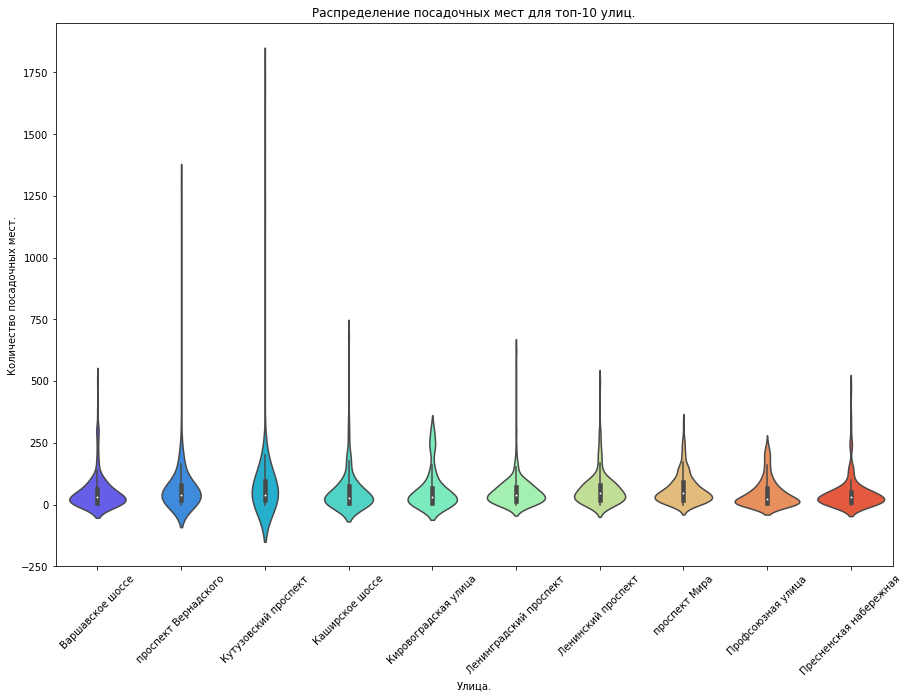

In [32]:
# Построение графика распределения количества посадочных мест по улицам.
plt.figure(figsize=(15, 10))
ax = sns.violinplot(x='streetname', y='number', data=top_number, palette='rainbow')
ax.set_title('Распределение посадочных мест для топ-10 улиц.')
ax.set_xlabel('Улица.')
ax.set_ylabel('Количество посадочных мест.')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

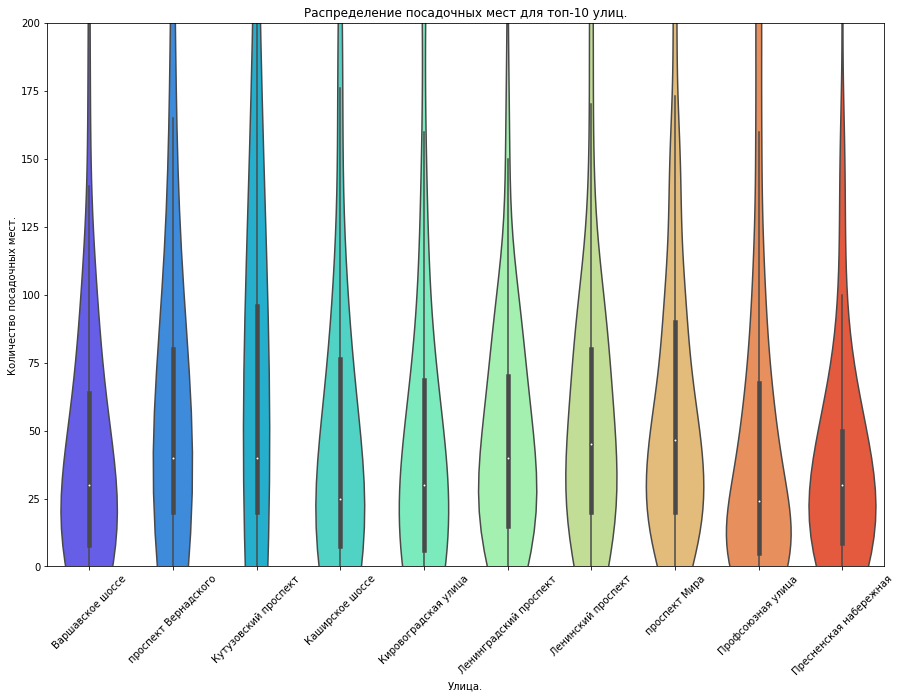

In [33]:
# Построение графика распределения количества посадочных мест по улицам.
plt.figure(figsize=(15, 10))
ax = sns.violinplot(x='streetname', y='number', data=top_number, palette='rainbow')
ax.set_title('Распределение посадочных мест для топ-10 улиц.')
ax.set_xlabel('Улица.')
ax.set_ylabel('Количество посадочных мест.')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylim(0, 200)
plt.show()

Для всех улиц характерны следующие признаки распределения посадочных мест:
 - Присутствуют нулевые значения. Заведениями с нулевым числом посадочных мест могут быть объекты типа МакАвто и аналолги, обслуживающие автомобилистов.
 - 3 квартиль для всех улиц не превышает 100 мест.
 - Медиана для 8 улиц из 10 распологается около центра 2 и 3 квартилей. Для остальных медиана немного смещена ко 2 квартилю.
 - Для 7 улиц характерно большое количество выбросов. Для Кировоградской улицы, проспекта Мира и Профсоюзной улицы выбросы не такие сильные.

## Вывод.

В проекте был проведён анализ данных заведений общественного питания в городе Москве.

При подготовке данных были обработаны не явные дубликаты в названиях заведений, а также обнаружены и обработаны ошибки при заполнении столбца 'chain'. Для некоторых заведений было указано, что они относятся к сетевым и не сетевым заведениям одновременно.

Анализ данных проходил в несколько этапов:
 - исследование соотношения видов объектов по количеству;
 - исследование количества сетевых и не сетевых заведений по количеству;
 - для каждого вида объекта общественного питания описать среднее количество посадочных мест;
 - построить график топ-10 улиц по количеству объектов общественного питания;
 - поиск числа улиц с одним объектом общественного питания;
 - посмотреть на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.

Изучение соотношения видов объектов по количеству показало, что наибольшее число заведений общественного питания это кафе, около 6000, что более чем в 2 раза превышает количество столовых, предприятий быстрого питания и рестораны. Наименьшее - магазин(отдел кулинарии), закусочная, кафетерий и буфет, около 500.

Для таких заведений как кафе, предприятия быстрого питания и рестораны чаще характерно создание сетей. Доля таких заведений от общего количества для каждого вида состовляет от 25% до 80%.

Наиболее вместительными по числу посадочных мест являются столовые и рестораны. В буфетах, барах и кафе в два разаменьше посадочных мест относительно первых двух. Ещё менее вместительными являются все остальные виды предприятий общественного питания.

Для определения улиц и районов с наибольшим и наименьшим количеством заведений общественного питания необходимо сначала выделить названия улиц в отдельный столбец из адресов. Далее построили топ-10 улиц по количеству объектов общественного питания и определили районы в которых они расположены. Наибольшее количество заведений общественного питания расположились в районе Теплый Стан и Обручевский район. В остальных районах от 275 до 313 заведений в каждом.

Следующий шаг это поиск улиц и районов с одним объектом общественного питания, всего таких улиц нашлось 575 штук. С помощью внешнего источника определили районы, где расположены эти улицы. Наибольшее количество таких улиц расположилось в роайонах, расположенных не далее третьего транспортного кольца относительно центра города.

В конце проекта посмотрим на распределение количества посадочных мест для топ-10 улиц по количеству заведений. Для всех улиц характерны следующие признаки распределения посадочных мест:
 - Присутствуют нулевые значения. Заведениями с нулевым числом посадочных мест могут быть объекты типа МакАвто и аналолги, обслуживающие автомобилистов.
 - 3 квартиль для всех улиц не превышает 100 мест.
 - Медиана для 8 улиц из 10 распологается около центра 2 и 3 квартилей. Для остальных медиана немного смещена ко 2 квартилю.
 - Для 7 улиц характерно большое количество выбросов. Для Кировоградской улицы, проспекта Мира и Профсоюзной улицы выбросы не такие сильные.

В результате проведённого исследования наиболее перспективным и прибыльным станет сеть предприятий быстрого обслуживания в районах: Таганский, Хамовники, Басманный, Пресненский, Тверской, Марьина Роща и Арбат. В этих районах не такая сильная конкуренция, что позволит быстрее развить сеть, и расположены ближе к центру города, куда приезжает много туристов из разных стран и городов. К томуже здесь распологаются офисы и торговые центры с большим количеством потенциальных клиентов.

https://disk.yandex.ru/i/VA8lFh-coWW2Rw